## Problem: Path with minimum effort

LeetCode: 1631
https://leetcode.com/problems/path-with-minimum-effort/description/

You are a hiker preparing for an upcoming hike. You are given heights, a 2D array of size rows x columns, where heights[row][col] represents the height of cell (row, col). You are situated in the top-left cell, (0, 0), and you hope to travel to the bottom-right cell, (rows-1, columns-1) (i.e., 0-indexed). You can move up, down, left, or right, and you wish to find a route that requires the minimum effort.

A route's effort is the maximum absolute difference in heights between two consecutive cells of the route.

Return the minimum effort required to travel from the top-left cell to the bottom-right cell.

 

Example 1:

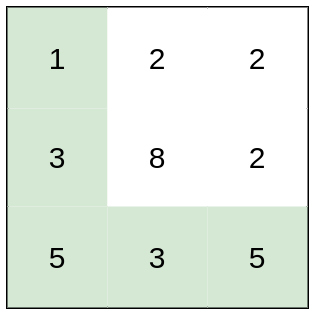

    Input: heights = [[1,2,2],[3,8,2],[5,3,5]]
    Output: 2
    Explanation: The route of [1,3,5,3,5] has a maximum absolute difference of 2 in consecutive cells.
    This is better than the route of [1,2,2,2,5], where the maximum absolute difference is 3.
Example 2:



    Input: heights = [[1,2,3],[3,8,4],[5,3,5]]
    Output: 1
    Explanation: The route of [1,2,3,4,5] has a maximum absolute difference of 1 in consecutive cells, which is better than route [1,3,5,3,5].
Example 3:


    Input: heights = [[1,2,1,1,1],[1,2,1,2,1],[1,2,1,2,1],[1,2,1,2,1],[1,1,1,2,1]]
    Output: 0
    Explanation: This route does not require any effort.
 

Constraints:

    rows == heights.length
    columns == heights[i].length
    1 <= rows, columns <= 100
    1 <= heights[i][j] <= 106

## Approach: Dijkstra's Algorithm

If we observe, the problem is similar to finding the shortest path from a source cell to a destination cell. Here, the shortest path is the one with minimum absolute difference between every adjacent cells in that path.

The absolute difference between adjacent cells A and B can be perceived as the weight of an edge from cell A to cell B. Thus, we could use Dijkstra's Algorithm which is used to find the shortest path in a weighted graph with a slight modification of criteria for the shortest path.

In [10]:
import heapq
def minimumEffortPath(heights):
        m = len(heights)
        n = len(heights[0])
        diff = [[float("inf")]*n for _ in range(m)]
        visited = [[False]* n for _ in range(m)]
        minHeap = []
        heapq.heappush(minHeap, (0, 0,0)) # difference, row, col
        diff[0][0] = 0
        while minHeap:
            currentDiff, row, col = heapq.heappop(minHeap)
            visited[row][col] = True
            nebrs = getNebrs(row, col, heights)
            for r, c in nebrs:
                if visited[r][c]:
                    continue
                nextDiff = abs(heights[r][c] - heights[row][col])
                maxDiff = max(nextDiff, diff[row][col] )
                if maxDiff < diff[r][c]:
                    diff[r][c] = maxDiff
                    heapq.heappush(minHeap, (diff[r][c], r,c))
        return diff[-1][-1]

def getNebrs(row, col, heights):
    nebrs = []
    if row> 0:
        nebrs.append((row-1, col))
    if row < len(heights)-1:
        nebrs.append((row+1, col))
    if col > 0:
        nebrs.append((row, col-1))
    if col < len(heights[0])-1:
        nebrs.append((row, col+1))
    return nebrs
        

In [11]:
heights = [[1,2,3],[3,8,4],[5,3,5]]
minimumEffortPath(heights)

1

In [12]:
heights = [[1,2,2],[3,8,2],[5,3,5]]
minimumEffortPath(heights)

2